In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import json
from pprint import pprint
from config import g_key

# Resource File (CSV)
df = pd.read_csv("output_data/Top_100.csv")

In [3]:
df.head()

,Unnamed: 0,Restaurant_id,Name,Locality,Address,City,Latitude,Longitude,Price Range,Average Cost for two,User Rating,Rating Text,Votes,all_reviews_count,Cuisines
0,0,16572612,Vue de monde,CBD,"Level 55, Rialto, 525 Collins Street, CBD, Mel...",Melbourne,-37.818954,144.957934,4,600,4.9,Excellent,3225,987,"Australian, Contemporary"
1,1,16585905,Tipo 00,CBD,"361 Little Bourke Street, CBD, Melbourne",Melbourne,-37.813528,144.961973,4,150,4.9,Excellent,1927,717,Italian
2,2,17881527,Dexter,Preston,"456 High Street, Preston, Melbourne",Melbourne,-37.736196,145.004456,4,110,4.9,Excellent,1475,685,"American, BBQ"
3,3,16558798,Quay,Circular Quay,"Upper Level, Overseas Passenger Terminal 5 Hic...",Sydney,-33.858029,151.209970,4,500,4.9,Excellent,1366,454,Modern Australian
4,4,16559171,Tetsuya's,CBD,"529 Kent Street, CBD, Sydney",Sydney,-33.875143,151.204932,4,440,4.9,Excellent,1235,329,Japanese


In [4]:
#Where are located the top 100 restaurants (user rating - number of votes)

#Group df (5 cities) by City
group_city = df.groupby("City")
#Check the number of restaurants per city
city_df = pd.DataFrame(group_city["Restaurant_id"].count())

city_df

,Restaurant_id
City,
Adelaide,8
Brisbane,10
Melbourne,44
Perth,12
Sydney,26


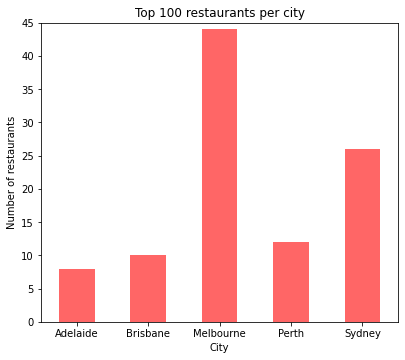

<Figure size 432x288 with 0 Axes>

In [9]:
#Plotting the top 100 restaurants with a bar graph
#Plotting the bar chart:
city_df.plot(kind="bar", facecolor="red", alpha=0.6,rot=0, figsize=(6.4,5.5), legend = None)
# Set textual properties
plt.title("Top 100 restaurants per city")
plt.ylabel("Number of restaurants")
plt.xlim(-0.5,len(city_df)-0.5)
plt.ylim(0,45)
#Save image
plt.savefig('images/Number of restaurants per city among the Top 100 restaurants.png')
# Show plot
plt.show()
plt.tight_layout()

In [11]:
#Calculation of the average cost and user-rating per city
#Group df (5 cities) by City
group_city = df.groupby("City")
#Calculate the average cost for two per city
average_city = pd.DataFrame(group_city["Average Cost for two"].mean())

average_city

,Average Cost for two
City,
Adelaide,108.125000
Brisbane,94.000000
Melbourne,140.909091
Perth,122.500000
Sydney,129.423077


In [20]:
average = df["Average Cost for two"].mean()
average

128.4

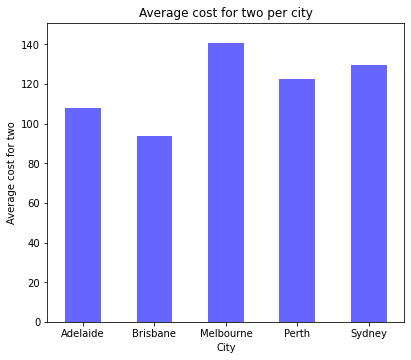

<Figure size 432x288 with 0 Axes>

In [16]:
#Plotting the average cost for two per city
average_city.plot(kind="bar", facecolor="blue", alpha=0.6, rot=0, figsize=(6.4,5.5), legend = None)
# Set textual properties
plt.title("Average cost for two per city")
plt.ylabel("Average cost for two")
plt.xlim(-0.5,len(average_city)-0.5)
plt.ylim(0,max(average_city["Average Cost for two"])+10)
#Save image
plt.savefig('images/Average cost for two per city.png')
# Show plot
plt.show()
plt.tight_layout()

In [18]:
#Calculate the median of the average cost for two per city
median_city = pd.DataFrame(group_city["Average Cost for two"].median())
median_city.columns=["Median"]
median_city

,Median
City,
Adelaide,80
Brisbane,70
Melbourne,105
Perth,75
Sydney,90


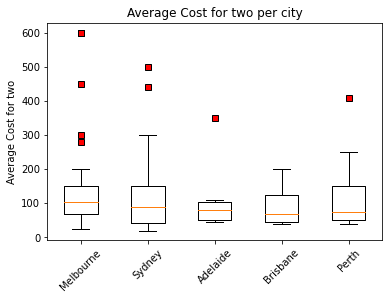

In [59]:
# Generate a box plot of the average cost for two across the five cities
Rest_Melbourne = df.loc[df["City"]=="Melbourne","Average Cost for two"]
Rest_Sydney = df.loc[df["City"]=="Sydney","Average Cost for two"]
Rest_Adelaide = df.loc[df["City"]=="Adelaide","Average Cost for two"]
Rest_Brisbane = df.loc[df["City"]=="Brisbane","Average Cost for two"]
Rest_Perth = df.loc[df["City"]=="Perth","Average Cost for two"]

data = [Rest_Melbourne,Rest_Sydney, Rest_Adelaide,Rest_Brisbane,Rest_Perth]
Cities = ["Melbourne", "Sydney", "Adelaide", "Brisbane", "Perth"]
red_square = dict(markerfacecolor='r', marker='s')

fig1, ax1 = plt.subplots()
ax1.set_title('Average Cost for two per city')
ax1.set_xticklabels(Cities, rotation=45, fontsize=10)
ax1.set_ylabel('Average Cost for two')
ax1.boxplot(data, flierprops=red_square)
plt.show()

In [49]:
#Calculate the average user rating per city
average_rating = pd.DataFrame(group_city["User Rating"].mean())
#Insert a column with average rating
average_rating

,User Rating
City,
Adelaide,4.775000
Brisbane,4.760000
Melbourne,4.754545
Perth,4.775000
Sydney,4.784615


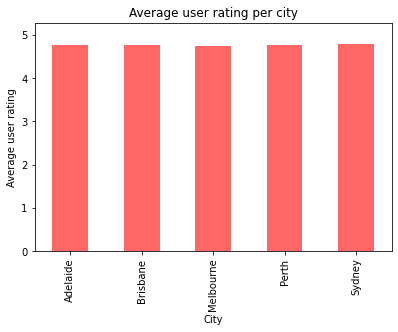

<Figure size 432x288 with 0 Axes>

In [51]:
#Plotting the average rating per city
average_rating.plot(kind="bar", facecolor="red", alpha=0.6, figsize=(6.4,4.2), legend = None)
# Set textual properties
plt.title("Average user rating per city")
plt.ylabel("Average user rating")
plt.xlim(-0.5,len(average_rating)-0.5)
plt.ylim(0,max(average_rating["User Rating"])+0.5)
# Show plot
plt.show()
plt.tight_layout()

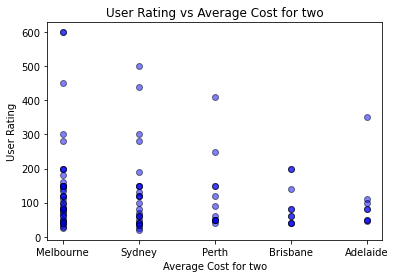

In [52]:
#Scatter plot of the average cost two and average rating
#Scatter plot Average cost for two vs User Rating
y = df["Average Cost for two"]
x = df["City"] 

plt.scatter(x,y, color='blue', edgecolor = 'black', alpha=0.5)
plt.xlabel('Average Cost for two')
plt.ylabel('User Rating')
plt.title('User Rating vs Average Cost for two')
#plt.savefig('images/User Rating vs. Average Cost.png')
plt.show()

In [53]:
# Configure gmaps with API key
gmaps.configure(api_key=g_key)

#Creating a restaurant symbol map

# Using the template add the restaurant marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Name}</dd>
<dt>Cuisine</dt><dd>{Cuisines}</dd>
<dt>User rating</dt><dd>{Rating Text}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
restaurant_info = [info_box_template.format(**row) for index, row in df.iterrows()]
locations = df[["Latitude", "Longitude"]]

In [54]:
# Add marker layer ontop of heat map

# Create hotel layer
restaurant_layer = gmaps.symbol_layer(
    locations, fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=5,
    info_box_content=restaurant_info
)
fig = gmaps.figure()
fig.add_layer(restaurant_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))